In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from scipy.stats import trim_mean
import seaborn as sns
from Functions import get_dummies, label_encoder, get_models

In [2]:
df_boats = pd.read_csv('../CSV/df_cleaned_without_nulls.csv')

In [3]:
df_boats.drop(columns=['Unnamed: 0', 'ID', 'MODEL', 'LINK'], inplace=True)

In [4]:
df_boats.PRICE_EUR.mean()

306390.7870741223

In [5]:
from scipy.stats import trim_mean
trim_mean(df_boats.PRICE_EUR, 0.1)

148125.16650195062

<AxesSubplot: xlabel='PRICE_EUR', ylabel='Count'>

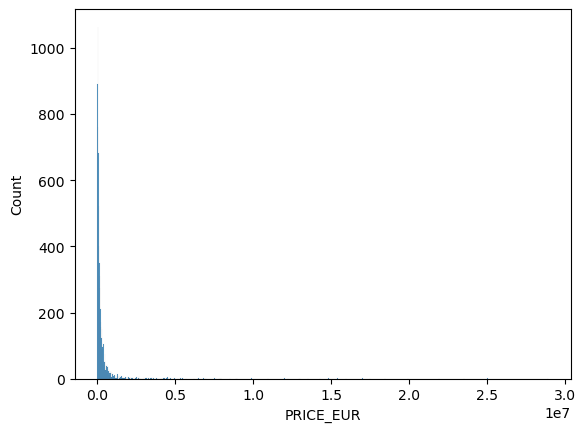

In [6]:
import seaborn as sns
sns.histplot(df_boats.PRICE_EUR)
#sns.boxplot(df_boats.PRICE_EUR)

In [7]:
print(df_boats.MANUFACTURER.value_counts())


Jeanneau         278
Bavaria          241
Beneteau         219
Sea              194
Quicksilver      192
                ... 
Selection          1
Oxelo              1
Swinboten          1
Rivierklipper      1
Boarnstream        1
Name: MANUFACTURER, Length: 1810, dtype: int64


In [8]:
for column in df_boats.columns:
    u = df_boats[column].nunique()
    print(column)
    print(f'unique values: {u}\n')

LOCATION
unique values: 64

CONDITION
unique values: 2

MANUFACTURER
unique values: 1810

YEAR BUILT
unique values: 124

CATEGORY
unique values: 4

SUBCATEGORY
unique values: 45

MATERIAL
unique values: 9

LENGTH (m)
unique values: 1436

BEAM (m)
unique values: 556

DRAUGHT
unique values: 290

NUM_ENGINES
unique values: 4

ENGINE_HP
unique values: 493

ENGINE_KW
unique values: 430

PRICE_EUR
unique values: 2523



In [9]:
df_boats.drop(columns=['MANUFACTURER'], inplace=True)

With get_dummies:

In [10]:
columns_to_encode = ['LOCATION', 'CONDITION', 'CATEGORY', 'SUBCATEGORY', 'MATERIAL']

In [11]:
df_dummies = get_dummies(df_boats, 'LOCATION', 'CONDITION', 'CATEGORY', 'SUBCATEGORY', 'MATERIAL')

In [12]:
#encoded_columns = pd.get_dummies(df_boats[['LOCATION', 'CONDITION', 'CATEGORY', 'SUBCATEGORY', 'MATERIAL']])
#dummies_boat_df = pd.concat([df_boats, encoded_columns], axis=1)

In [13]:
#dummies_boat_df.drop(columns = ['LOCATION', 'CONDITION', 'CATEGORY', 'SUBCATEGORY', 'MATERIAL'], inplace=True)

In [14]:
get_models(df_dummies)

Training: LinearRegression()
Training: Ridge()
Training: Lasso()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.099e+15, tolerance: 7.968e+11
  model = cd_fast.enet_coordinate_descent(


Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()
Training: SVR()
------------lr------------

MAE, error: 261488.8514618731
MSE, error: 301591779873.1424
RMSE, error: 549173.7246747538
r2: 0.48784041634179964


------------ridge------------

MAE, error: 259399.45163041668
MSE, error: 283511509400.49615
RMSE, error: 532457.9883901604
r2: 0.5185441172238101


------------lasso------------

MAE, error: 261513.72823416395
MSE, error: 301287738000.9734
RMSE, error: 548896.8373027607
r2: 0.48835673664313617


------------sgd------------

MAE, error: 250707877825797.66
MSE, error: 6.851715712213501e+28
RMSE, error: 261757821510905.4
r2: -1.1635502360136171e+17


------------knn------------

MAE, error: 144439.25537581276
MSE, error: 213905556583.06592
RMSE, error: 462499.25035946374
r2: 0.636748120761647


------------grad------------

MAE, error: 140506.92853996798
MSE, error: 407356555819.07086
RMSE, error: 638244.9026972882
r2: 0.308231928216048

In [15]:
#x = dummies_boat_df.drop(columns=['PRICE_EUR'])
#y = dummies_boat_df.PRICE_EUR

In [16]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
#y_train.shape

In [18]:
#models = {
    #"lr": LinReg(),
    #"ridge": Ridge(), #lr similar
    #"lasso": Lasso(), # lr similar 
    #"sgd": SGDRegressor(),
    #"knn": KNeighborsRegressor(),
    #"grad": GradientBoostingRegressor(),
    #"svr": SVR() #potato chip
#}

for model in models.values():
    print(f"Training: {model}")
    model.fit(x_train, y_train)

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"------------{name}------------\n")
    print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print("\n")

with LABEL ENCODER:

In [19]:
df_boats

,LOCATION,CONDITION,YEAR BUILT,CATEGORY,SUBCATEGORY,MATERIAL,LENGTH (m),BEAM (m),DRAUGHT,NUM_ENGINES,ENGINE_HP,ENGINE_KW,PRICE_EUR
0,Italy,USED BOAT,2015,sailingboats,Catamaran,GRP,23.00,10.40,2.40,2,240.0,177.0,2700000.0
1,Netherlands,USED BOAT,1916,powerboats,Trawler,Steel,18.60,3.62,1.10,1,160.0,118.0,79500.0
2,Switzerland,USED BOAT,1981,sailingboats,Sailing Yacht,GRP,8.90,3.10,1.52,1,19.0,14.0,20298.0
3,Germany,USED BOAT,1978,sailingboats,Keelboat,GRP,7.30,2.30,0.40,1,60.0,44.0,5500.0
4,Netherlands,USED BOAT,2001,powerboats,Sloep,GRP,7.20,2.45,0.60,1,24.0,18.0,44500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7685,Netherlands,USED BOAT,2020,powerboats,Cabin Cruiser,GRP,6.19,2.38,0.88,1,150.0,110.0,44900.0
7686,Germany,NEW BOAT,2022,powerboats,Sloep,GRP,7.00,2.50,0.70,1,42.0,31.0,77670.0
7687,Netherlands,NEW BOAT,2022,powerboats,Sloep,Aluminium,7.38,2.70,0.60,1,100.0,74.0,69500.0
7688,Germany,USED BOAT,2014,sailingboats,Center Cockpit,Wood,16.80,4.50,2.30,1,85.0,63.0,250000.0


In [20]:
df_lencoder = label_encoder(df_boats, 'LOCATION', 'CONDITION', 'CATEGORY', 'SUBCATEGORY', 'MATERIAL')

In [21]:
df_lencoder

,LOCATION,CONDITION,YEAR BUILT,CATEGORY,SUBCATEGORY,MATERIAL,LENGTH (m),BEAM (m),DRAUGHT,NUM_ENGINES,ENGINE_HP,ENGINE_KW,PRICE_EUR
0,27,1,2015,2,2,3,23.00,10.40,2.40,2,240.0,177.0,2700000.0
1,41,1,1916,1,40,7,18.60,3.62,1.10,1,160.0,118.0,79500.0
2,56,1,1981,2,36,3,8.90,3.10,1.52,1,19.0,14.0,20298.0
3,17,1,1978,2,21,3,7.30,2.30,0.40,1,60.0,44.0,5500.0
4,41,1,2001,1,37,3,7.20,2.45,0.60,1,24.0,18.0,44500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7685,41,1,2020,1,1,3,6.19,2.38,0.88,1,150.0,110.0,44900.0
7686,17,0,2022,1,37,3,7.00,2.50,0.70,1,42.0,31.0,77670.0
7687,41,0,2022,1,37,0,7.38,2.70,0.60,1,100.0,74.0,69500.0
7688,17,1,2014,2,3,8,16.80,4.50,2.30,1,85.0,63.0,250000.0


label_encoded_boats = df_boats
columns_to_encode = ['LOCATION', 'CONDITION', 'CATEGORY', 'SUBCATEGORY', 'MATERIAL']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    label_encoded_boats[column] = label_encoder.fit_transform(label_encoded_boats[column])

In [22]:
get_models(df_lencoder)

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+15, tolerance: 7.968e+11
  model = cd_fast.enet_coordinate_descent(


Training: SVR()
------------lr------------

MAE, error: 298035.92956541013
MSE, error: 305169274244.0517
RMSE, error: 552421.2833011159
r2: 0.48176515783072493


------------ridge------------

MAE, error: 298018.3102369912
MSE, error: 305166691266.1954
RMSE, error: 552418.9454265625
r2: 0.48176954421308604


------------lasso------------

MAE, error: 298319.1165373445
MSE, error: 305295823286.79553
RMSE, error: 552535.8117686089
r2: 0.4815502537472274


------------sgd------------

MAE, error: 702209024752566.1
MSE, error: 5.4132083814215556e+29
RMSE, error: 735745090464187.6
r2: -9.192646271891434e+17


------------knn------------

MAE, error: 172165.19078283483
MSE, error: 286109405610.6389
RMSE, error: 534891.9569507836
r2: 0.5141324006911727


------------grad------------

MAE, error: 144654.72902163558
MSE, error: 446773242832.57446
RMSE, error: 668410.9834769133
r2: 0.24129497781735665


------------svr------------

MAE, error: 257434.08076318481
MSE, error: 630015139256.8579
RMS

x = label_encoded_boats.drop(columns=['PRICE_EUR'])
y = label_encoded_boats.PRICE_EUR
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

models = {
    "lr": LinReg(),
    "ridge": Ridge(), #lr similar
    "lasso": Lasso(), # lr similar 
    "sgd": SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "svr": SVR() #potato chip
}

for model in models.values():
    print(f"Training: {model}")
    model.fit(x_train, y_train)

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"------------{name}------------\n")
    print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print("\n")

Let's get rid of outliers:

In [23]:
q1 = df_boats['PRICE_EUR'].quantile(0.25)
q3 = df_boats['PRICE_EUR'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_boats[(df_boats['PRICE_EUR'] < lower_bound) | (df_boats['PRICE_EUR'] > upper_bound)]

In [24]:
df_without_outliers = df_boats.drop(outliers.index)

In [25]:
df_without_outliers.shape

(6903, 13)

with dummies:

In [26]:
df_dummies = get_dummies(df_without_outliers, 'LOCATION', 'CONDITION', 'CATEGORY', 'SUBCATEGORY', 'MATERIAL')

In [27]:
get_models(df_dummies)

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e+13, tolerance: 9.789e+09
  model = cd_fast.enet_coordinate_descent(


Training: SVR()
------------lr------------

MAE, error: 58567.09675438138
MSE, error: 6887219381.829954
RMSE, error: 82989.27269129398
r2: 0.5774060677760815


------------ridge------------

MAE, error: 58566.58779541415
MSE, error: 6887109049.476006
RMSE, error: 82988.60794998314
r2: 0.5774128376756189


------------lasso------------

MAE, error: 58561.76829672876
MSE, error: 6886718546.692929
RMSE, error: 82986.25516730423
r2: 0.5774367985947497


------------sgd------------

MAE, error: 1121660435891073.6
MSE, error: 1.5282678117853932e+30
RMSE, error: 1236231293806055.2
r2: -9.377321503326819e+19


------------knn------------

MAE, error: 46431.48291172214
MSE, error: 5802236203.323749
RMSE, error: 76172.41103788004
r2: 0.6439797141755834


------------grad------------

MAE, error: 40000.05460072023
MSE, error: 3950563038.218108
RMSE, error: 62853.50458182987
r2: 0.7575968070331057


------------svr------------

MAE, error: 92532.03520136912
MSE, error: 18456779529.221695
RMSE, err

with label encoder:

In [28]:
df_lencoded = label_encoder(df_without_outliers, 'LOCATION', 'CONDITION', 'CATEGORY', 'SUBCATEGORY', 'MATERIAL')

In [29]:
x = df_lencoded.drop(columns=['PRICE_EUR'])
y = df_lencoded.PRICE_EUR
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

models = {
    "lr": LinReg(),
    "ridge": Ridge(), #lr similar
    "lasso": Lasso(), # lr similar 
    "sgd": SGDRegressor(),
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "svr": SVR() #potato chip
}

for model in models.values():
    print(f"Training: {model}")
    model.fit(x_train, y_train)

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"------------{name}------------\n")
    print(f"MAE, error: {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MSE, error: {metrics.mean_squared_error(y_test, y_pred)}")
    print(f"RMSE, error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
    print(f"r2: {metrics.r2_score(y_test, y_pred)}")
    print("\n")

Training: LinearRegression()
Training: Ridge()
Training: Lasso()
Training: SGDRegressor()
Training: KNeighborsRegressor()
Training: GradientBoostingRegressor()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+13, tolerance: 8.817e+09
  model = cd_fast.enet_coordinate_descent(


Training: SVR()
------------lr------------

MAE, error: 58327.434633740195
MSE, error: 7349978754.329785
RMSE, error: 85732.01709005676
r2: 0.5159849338189233


------------ridge------------

MAE, error: 58328.25028113646
MSE, error: 7350093058.252591
RMSE, error: 85732.68372244386
r2: 0.5159774066106673


------------lasso------------

MAE, error: 58332.571812203794
MSE, error: 7350254647.505541
RMSE, error: 85733.62611895954
r2: 0.5159667655414104


------------sgd------------

MAE, error: 112130014578344.1
MSE, error: 1.280379723319686e+28
RMSE, error: 113153865303828.05
r2: -8.431630855455398e+17


------------knn------------

MAE, error: 56214.02065459812
MSE, error: 7499522092.576439
RMSE, error: 86599.78113469132
r2: 0.5061371191275197


------------grad------------

MAE, error: 41293.71501646861
MSE, error: 4407889193.381906
RMSE, error: 66391.93620750871
r2: 0.7097291229043641


------------svr------------

MAE, error: 88793.46628990193
MSE, error: 17178008791.412527
RMSE, err

In [30]:
models['grad'].feature_importances_

array([0.0047024 , 0.00666401, 0.25493887, 0.00045899, 0.00352752,
       0.00356945, 0.40972801, 0.2145324 , 0.01735962, 0.01757887,
       0.04532561, 0.02161426])

In [31]:
df_lencoded.columns

Index(['LOCATION', 'CONDITION', 'YEAR BUILT', 'CATEGORY', 'SUBCATEGORY',
       'MATERIAL', 'LENGTH (m)', 'BEAM (m)', 'DRAUGHT', 'NUM_ENGINES',
       'ENGINE_HP', 'ENGINE_KW', 'PRICE_EUR'],
      dtype='object')

In [32]:
df_without_outliers.drop(columns=['CATEGORY'], inplace=True)

In [33]:
df_lencoded = label_encoder(df_without_outliers, 'LOCATION', 'CONDITION', 'SUBCATEGORY', 'MATERIAL')

<AxesSubplot: xlabel='PRICE_EUR', ylabel='Count'>

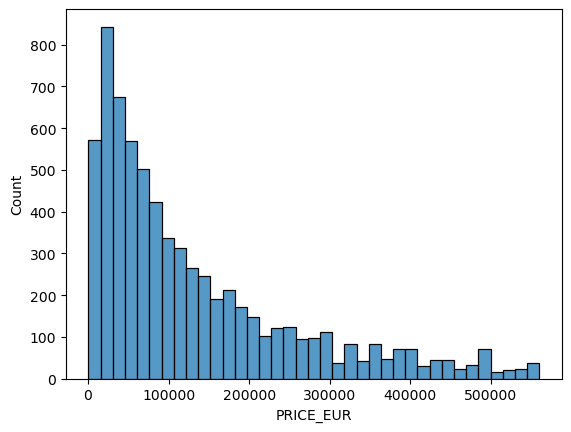

In [34]:
sns.histplot(df_without_outliers.PRICE_EUR)
#sns.boxplot(df_without_outliers.PRICE_EUR)

<AxesSubplot: xlabel='PRICE_EUR'>

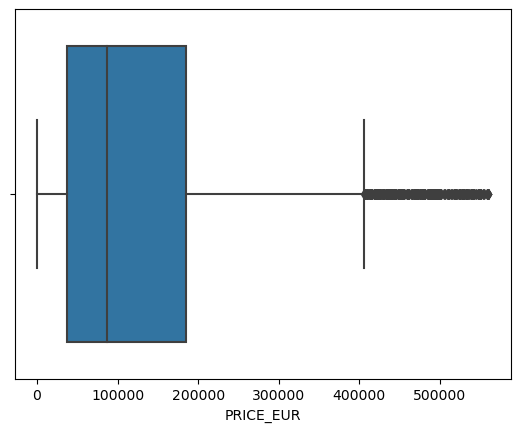

In [35]:
sns.boxplot(x=df_without_outliers["PRICE_EUR"])